In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from datetime import datetime
sns.set_style('white')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [2]:
df = pd.read_csv("price_cleaned.csv")

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,1/5/2016 0:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,1/6/2016 0:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,1/7/2016 0:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,1/8/2016 0:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,1/11/2016 0:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [4]:
df.tail()

,date,symbol,open,close,low,high,volume
851259,12/30/2016,ZBH,103.309998,103.199997,102.849998,103.930000,973800
851260,12/30/2016,ZION,43.070000,43.040001,42.689999,43.310001,1938100
851261,12/30/2016,ZTS,53.639999,53.529999,53.270000,53.740002,1701200
851262,12/30/2016 0:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900
851263,12/30/2016 0:00,FTV,54.200001,53.630001,53.389999,54.480000,705100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null object
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 45.5+ MB


In [6]:
pd.isnull(df).sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [7]:
df['symbol'].nunique()

501

In [8]:
array = ['GOOGL', 'MSFT', 'AMZN', 'CVS','YHOO']
df2=df.loc[df['symbol'].isin(array)]
df2

,date,symbol,open,close,low,high,volume
284,1/4/2010,AMZN,136.250000,133.899994,133.139999,136.610001,7599900
362,1/4/2010,CVS,32.430000,32.980000,32.380001,33.060001,14676800
440,1/4/2010,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400
544,1/4/2010,MSFT,30.620001,30.950001,30.590000,31.100000,38409100
713,1/4/2010,YHOO,16.940001,17.100000,16.879999,17.200001,16587400
751,1/5/2010,AMZN,133.429993,134.690002,131.809998,135.479996,8851900
830,1/5/2010,CVS,32.930000,32.849998,32.660000,33.029999,7512000
908,1/5/2010,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300
1012,1/5/2010,MSFT,30.850000,30.959999,30.639999,31.100000,49749600
1181,1/5/2010,YHOO,17.219999,17.230000,17.000000,17.230000,11718100


In [9]:
df2.date = pd.to_datetime(df2.date)

In [10]:
df2 = df2.drop('high', axis=1)

In [11]:
df2 = df2.drop('low', axis=1)

In [12]:
df2= df2.drop('volume', axis=1)

In [13]:
df2 = df2.drop('open', axis=1)

In [14]:
df3 = pd.pivot_table(df2,index="date", columns="symbol", values="close").rename_axis(None,axis=1)

In [15]:
df3.head()

,AMZN,CVS,GOOGL,MSFT,YHOO
date,,,,,
2010-01-04,133.899994,32.980000,626.750011,30.950001,17.100000
2010-01-05,134.690002,32.849998,623.990017,30.959999,17.230000
2010-01-06,132.250000,32.560001,608.260035,30.770000,17.170000
2010-01-07,130.000000,33.759998,594.100015,30.450001,16.700001
2010-01-08,133.520004,34.000000,602.020005,30.660000,16.700001


In [16]:
df3.describe()

,AMZN,CVS,GOOGL,MSFT,YHOO
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
mean,337.899058,63.671986,675.583348,37.129841,27.291992
std,189.109339,26.185976,161.869288,10.810695,11.406846
min,108.610001,26.980000,436.069999,23.010000,11.090000
25%,193.377506,37.482501,555.770031,27.840000,15.920000
50%,282.915008,58.524999,616.500017,33.024999,26.750000
75%,398.014999,90.885000,762.774979,46.107500,37.377501
max,844.359985,113.449997,1220.169982,63.619999,52.369999


In [17]:
df3.head()

,AMZN,CVS,GOOGL,MSFT,YHOO
date,,,,,
2010-01-04,133.899994,32.980000,626.750011,30.950001,17.100000
2010-01-05,134.690002,32.849998,623.990017,30.959999,17.230000
2010-01-06,132.250000,32.560001,608.260035,30.770000,17.170000
2010-01-07,130.000000,33.759998,594.100015,30.450001,16.700001
2010-01-08,133.520004,34.000000,602.020005,30.660000,16.700001


In [18]:
import matplotlib.dates as mdates

Calculating correlation

In [19]:
# calculate correlation matrix
df3.corr()

,AMZN,CVS,GOOGL,MSFT,YHOO
AMZN,1.000000,0.805660,0.395674,0.917427,0.705537
CVS,0.805660,1.000000,0.236067,0.892104,0.893588
GOOGL,0.395674,0.236067,1.000000,0.260202,0.322748
MSFT,0.917427,0.892104,0.260202,1.000000,0.839716
YHOO,0.705537,0.893588,0.322748,0.839716,1.000000


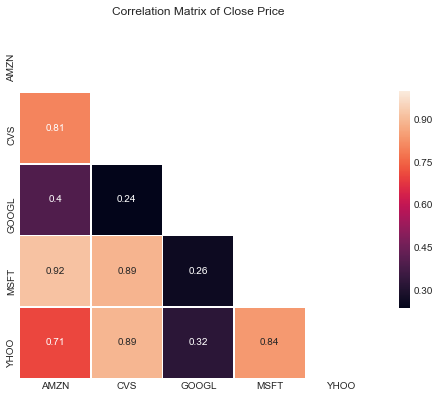

In [20]:
corr = df3.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plot correlation matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix of Close Price');

In [21]:
df3.iloc[0,:]

AMZN     133.899994
CVS       32.980000
GOOGL    626.750011
MSFT      30.950001
YHOO      17.100000
Name: 2010-01-04 00:00:00, dtype: float64

Simple Return

Simple Return = (Current Price - Purchase Price) / Purchase Price(*100%)

In [22]:
df4 = (df3 - df3.iloc[0,:])/df3.iloc[0,:]*100

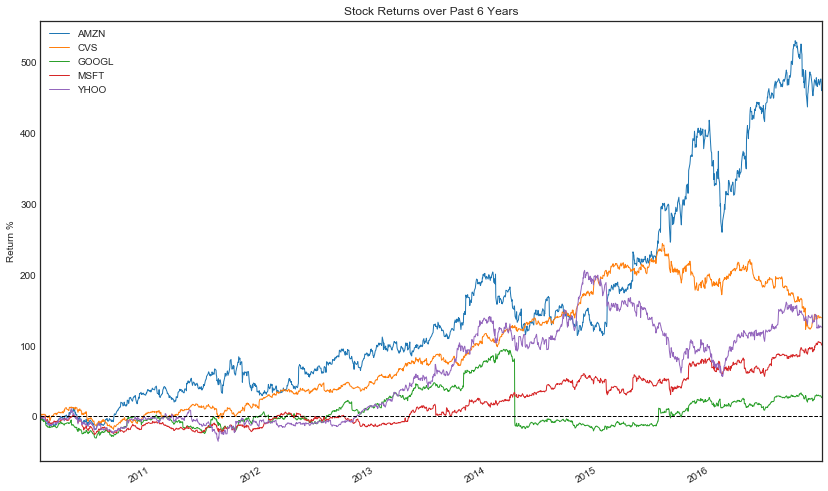

In [23]:
df4.plot(legend=True, figsize=(14, 9), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.xlabel('')
plt.ylabel('Return %')
plt.title('Stock Returns over Past 6 Years');

Annualized Total Return

Annualized Return = (Simple Return + 1) ^ (1 / Years Held) - 1

In [24]:
df4.columns

Index(['AMZN', 'CVS', 'GOOGL', 'MSFT', 'YHOO'], dtype='object')

In [56]:
# calculate annualized return with the 6-year simple return
annual_retn = {}
for t in df4.columns:
    annual_retn[t] = ((df4[t][-1:].values/100 + 1)**(1/6) - 1)*100

In [57]:
annual_retn

{'AMZN': array([33.26033574]),
 'CVS': array([15.65033693]),
 'GOOGL': array([3.98712896]),
 'MSFT': array([12.31862092]),
 'YHOO': array([14.56791421])}

In [58]:
y2 = [33.26033574,15.65033693,3.98712896,12.31862092,14.56791421]

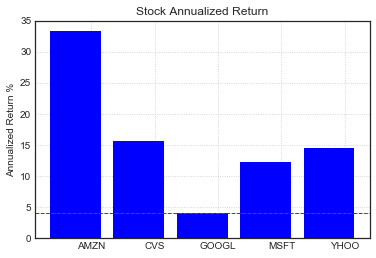

In [59]:
ind = np.arange(len(annual_retn))
width = 0.25
fig, ax = plt.subplots()
ax.bar(ind, y2, color='blue')
plt.axhline(y=annual_retn['GOOGL'], linestyle='dashed', color='red', linewidth=1)
ax.set_ylabel('Annualized Return %')
ax.set_title('Stock Annualized Return')
ax.set_xticks(ind + width)
ax.set_xticklabels(list(annual_retn.keys()))
ax.grid(True, linestyle=':', linewidth=0.85);

Daily Return

Daily Return = (Close Price Today - Close Price Yesterday) / Close Price Yesterday

In [29]:
daily_retn = df3.pct_change().dropna()
print('First 5 rows of the daily return dataset: ')
display(daily_retn.head())

First 5 rows of the daily return dataset: 


,AMZN,CVS,GOOGL,MSFT,YHOO
date,,,,,
2010-01-05,0.005900,-0.003942,-0.004404,0.000323,0.007602
2010-01-06,-0.018116,-0.008828,-0.025209,-0.006137,-0.003482
2010-01-07,-0.017013,0.036855,-0.023280,-0.010400,-0.027373
2010-01-08,0.027077,0.007109,0.013331,0.006897,0.000000
2010-01-11,-0.024041,-0.002059,-0.001512,-0.012720,0.002395


In [30]:
daily_retn.describe()

,AMZN,CVS,GOOGL,MSFT,YHOO
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.001186,0.000575,0.000363,0.000502,0.000647
std,0.020395,0.012591,0.019656,0.014607,0.019162
min,-0.126568,-0.118240,-0.496520,-0.113995,-0.087127
25%,-0.009159,-0.006400,-0.007190,-0.007415,-0.009837
50%,0.000578,0.000781,0.000300,0.000000,0.000545
75%,0.012250,0.007526,0.008384,0.008083,0.011154
max,0.157457,0.088621,0.162584,0.104522,0.103423


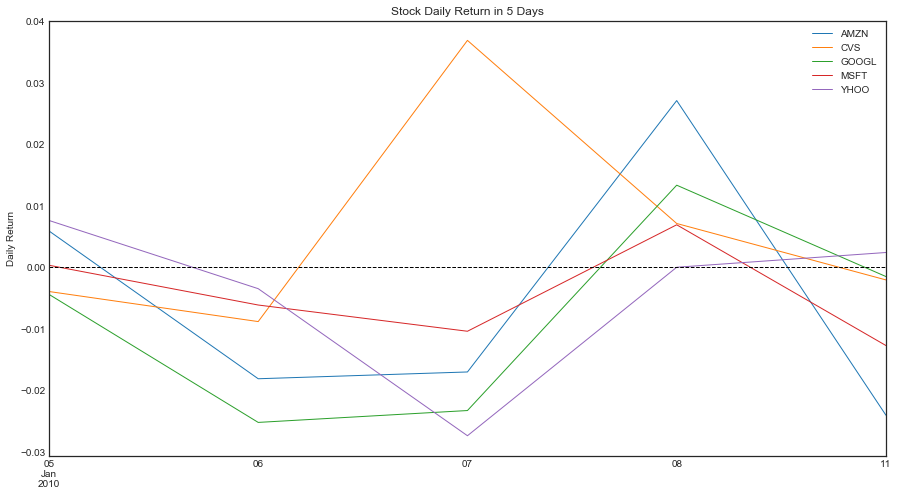

In [51]:
# plot daily return for 5 day period for clarity
daily_retn.iloc[:5].plot(legend=True, figsize=(15, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.ylabel('Daily Return')
plt.xlabel('')
plt.title('Stock Daily Return in 5 Days');

Volatility

Daily Volatility = Standard Deviation of Daily Return
Annualized Volatility = Daily Volatility * Squar Root of Number of Trading Days in a Year

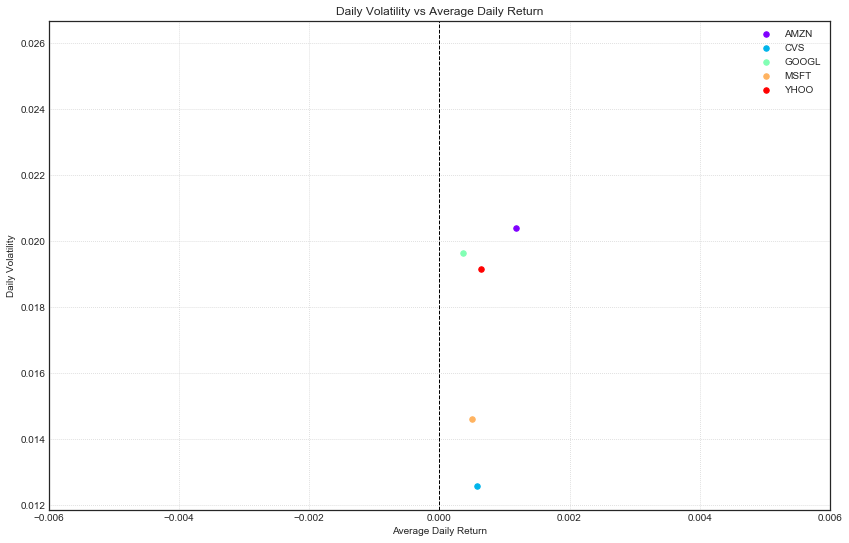

In [32]:
# plot daily volatility vs average daily return
colors = cm.rainbow(np.linspace(0, 1, len(daily_retn.columns)))
fig, ax = plt.subplots(figsize=(14, 9))

for l, x, y, c in zip(daily_retn.columns, 
                      daily_retn.mean(), 
                      daily_retn.std(), 
                      colors):
    plt.scatter(x, y, color=c, s=30, label=l)

plt.axvline(x=0, linewidth=1, linestyle='dashed', color='black')

ax.grid(True, linestyle=':', linewidth=0.75)
plt.xlim([-0.006, 0.006])
plt.xlabel('Average Daily Return')
plt.ylabel('Daily Volatility')
plt.title('Daily Volatility vs Average Daily Return')
plt.legend();

The Sharpe ratio is a risk-adjusted return measurement developed by economist William Sharpe. It is calculated by subtracting the risk-free return, defined as a U.S. Treasury Bond, from the investment's rate of return, and then dividing by the investment's standard deviation of returns. It is useful for comparing funds with similar historical returns. A higher Sharpe ratio indicates a higher risk-adjusted return. With the daily return data, we can calculate Sharpe ratio with the following formula:

Sharpe Ratio = Mean(stock daily return - risk_free daily return) / Stdv(stock daily return - risk_free daily return)

In [33]:
daily_rf_retn = (1 + 0.01)**(1/252) - 1

In [34]:
daily_retn_adj=daily_retn - daily_rf_retn

In [35]:
sharpe = {}
for t in daily_retn_adj.columns:
    sharpe[t] = daily_retn_adj[t].mean() / daily_retn_adj[t].std()

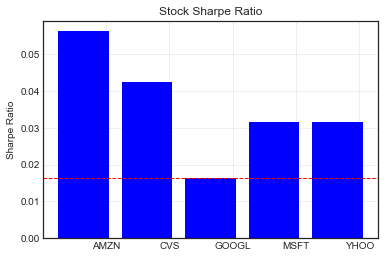

In [36]:
ind = np.arange(len(sharpe))
width = 0.35
fig, ax = plt.subplots()
ax.bar(ind, list(sharpe.values()), color='blue')
plt.axhline(y=sharpe['GOOGL'], linestyle='dashed', color='red', linewidth=1)
ax.set_ylabel('Sharpe Ratio')
ax.set_title('Stock Sharpe Ratio')
ax.set_xticks(ind + width)
ax.set_xticklabels(list(sharpe.keys()))
ax.grid(True, linestyle=':', linewidth=0.75);

BETA One measure of relative volatility of a particular stock to the market is its beta. Beta is a historical measure of volatility. When standard deviation measures an asset's price movements compared to its average over time, beta measures the asset's volatility relative to a benchmark (i.e. an index). A beta of zero implies no correlation between the assets. Any beta above zero would imply a positive correlation with volatility expressed by how much over zero the number is. Any beta below zero would imply a negative correlation with volatility expressed by how much under zero the number is.

Beta = Covariance(stock's daily return %, index's daily return %) / Var(index's daily return %)


In [37]:
ref = daily_retn['MSFT'].values # MSFT as benchmark
beta = {} 
for t in df3:
    beta[t] = np.cov(daily_retn[t].values, ref)[0][1]/np.var(ref)

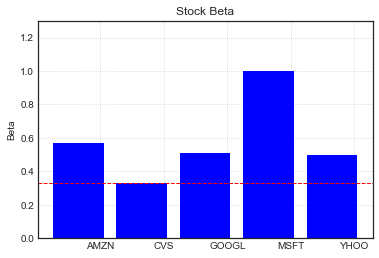

In [38]:
ind = np.arange(len(beta))
width = 0.35
fig, ax = plt.subplots()
ax.bar(ind, list(beta.values()), color='blue')
plt.axhline(y=beta['CVS'], linestyle='dashed', color='red', linewidth=1)
ax.set_ylabel('Beta')
ax.set_title('Stock Beta')
ax.set_ylim((0, 1.3))
ax.set_xticks(ind + width)
ax.set_xticklabels(list(beta.keys()))
ax.grid(True, linestyle=':', linewidth=0.75);

Alpha is the difference between a fund's expected returns based on its beta and its actual returns. It is used to measure performance on a risk adjusted basis. An alpha of zero means the investment has exactly earned a return adequate for the volatility assumed. An alpha over zero means the investment has has earned a return that has compensated for the volatility risk taken. An alpha of less than zero means the investment has earned a return that has not compensated for the volatility risk taken.

Alpha = Stock Return - Risk_Free Return - beta * (Index Return - Risk_Free Return)

Comparison between alpha and Sharp ratio:

Similarity: alpha and Sharpe ratio both offer a way to measure returns on a risk-adjusted basis. Difference: alpha applies the measure in relation to a benchmark, whereas Sharpe ratio is based on its own standard deviation (volatility in absolute term). Usage: for investors seeking an investment that closely matches the performance of a chosen benchmark, alpha is the number to review. But a fund's R-squared must be high for alpha to be meaningful. Sharpe ratio is meaningful all the time, and it can be used to compare funds of all types, e.g., stock or bond, because standard deviation is calculated the exact same way for any type of fund but different benchmarks will be used to calculate beta, and beta-based alpha.


In [39]:
alpha = {}
for i, (k, v) in enumerate(beta.items()):
    alpha[k] = annual_retn[k]/100 - 0.01 - v*(annual_retn['MSFT']/100 - 0.01)

In [40]:
alpha

{'AMZN': array([0.2582633]),
 'CVS': array([0.10903831]),
 'GOOGL': array([-0.02799175]),
 'MSFT': array([-6.43103461e-05]),
 'YHOO': array([0.07936854])}

In [41]:
y3=[0.47215612,0.0830992,0.49246491,-5.19793151e-05,0.07936854]

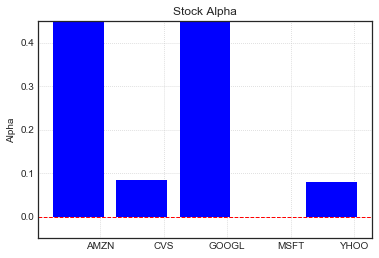

In [42]:
ind = np.arange(len(alpha))
width = 0.35
fig, ax = plt.subplots()
ax.bar(ind, y3, color='blue')
plt.axhline(y=alpha['MSFT'], linestyle='dashed', color='red', linewidth=1)
ax.set_ylabel('Alpha')
ax.set_title('Stock Alpha')
ax.set_ylim((-0.05, 0.45))
ax.set_xticks(ind + width)
ax.set_xticklabels(list(alpha.keys()))
ax.grid(True, linestyle=':', linewidth=0.75);

Looking at stock data which is for present for 6 years

In [43]:
all_tickers = [] 
length = len(df[df['symbol'] == 'CVS'].index)

In [44]:
length

1762

In [45]:
for t in df['symbol'].unique():
    if len(df[df['symbol'] == t].index) == length:
        all_tickers.append(t)
print('Number of stocks with 6-year data: {}'.format(len(all_tickers)))

Number of stocks with 6-year data: 467


In [46]:
ar1 = ['AMZN']
df9=df.loc[df['symbol'].isin(ar1)]
df9.head()

,date,symbol,open,close,low,high,volume
284,1/4/2010,AMZN,136.250000,133.899994,133.139999,136.610001,7599900
751,1/5/2010,AMZN,133.429993,134.690002,131.809998,135.479996,8851900
1219,1/6/2010,AMZN,134.600006,132.250000,131.649994,134.729996,7178800
1687,1/7/2010,AMZN,132.009995,130.000000,128.800003,132.320007,11030200
2155,1/8/2010,AMZN,130.559998,133.520004,129.029999,133.679993,9830500


In [47]:
init_notebook_mode(connected=True)

In [48]:
trace = go.Candlestick(x=df9.date,open=df9.open,high=df9.high,low=df9.low,close=df9.close)
datu = [trace]
plotly.offline.iplot(datu, filename='simple_candlestick')